In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hcbagde17/cognifzy_ml_tasks/refs/heads/main/task1/partial_cleaned_dataset.csv')
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Switch to order menu  9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [4]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [5]:
exchange_rates = {
    'Botswana Pula(P)': 6.78,
    'Brazilian Real(R$)': 16.94,
    'Dollar($)': 89.95,  
    'Emirati Diram(AED)': 24.49,
    'Indian Rupees(Rs.)': 1.0,
    'Indonesian Rupiah(IDR)': 0.0054,
    'NewZealand($)': 51.94,
    'Pounds(��)': 119.99, 
    'Qatari Rial(QR)': 24.71,
    'Rand(R)': 5.31,
    'Sri Lankan Rupee(LKR)': 0.29,
    'Turkish Lira(TL)': 2.12
}

In [6]:
df['Rates'] = df['Currency'].map(exchange_rates)
df['Average Cost for 2 in INR'] = df['Average Cost for two'] * df['Rates']

In [7]:
df = df.drop(columns=['Average Cost for two', 'Rates'])
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for 2 in INR
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,7458.0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,8136.0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,27120.0
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,10170.0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,10170.0


In [8]:
df['Cuisines'].mode()[0]

'North Indian'

In [9]:
df_copy = df.groupby('Country Code')['Cuisines'].apply(lambda x: x.mode()[0]).reset_index()
print(f'Most common cuisine in each country:\n{df_copy}')

Most common cuisine in each country:
    Country Code                         Cuisines
0              1                     North Indian
1             14        Breakfast, Coffee and Tea
2             30                        Brazilian
3             37                            Asian
4             94                Sunda, Indonesian
5            148                             Cafe
6            162                         Filipino
7            166                           Indian
8            184                           French
9            189                          Mexican
10           191  American, Chinese, North Indian
11           208                             Cafe
12           214                           Indian
13           215                          Italian
14           216                          Mexican


In [10]:
df = df.dropna(subset=['Cuisines'])

In [11]:
df['Cuisine_count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for 2 in INR,Cuisine_count
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,7458.0,3
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,8136.0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,27120.0,4
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,10170.0,2
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,10170.0,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Restaurant Name            9542 non-null   object 
 1   Country Code               9542 non-null   int64  
 2   City                       9542 non-null   object 
 3   Address                    9542 non-null   object 
 4   Locality                   9542 non-null   object 
 5   Longitude                  9542 non-null   float64
 6   Latitude                   9542 non-null   float64
 7   Cuisines                   9542 non-null   object 
 8   Currency                   9542 non-null   object 
 9   Has Table booking          9542 non-null   object 
 10  Has Online delivery        9542 non-null   object 
 11  Is delivering now          9542 non-null   object 
 12  Switch to order menu       9542 non-null   object 
 13  Price range                9542 non-null   int64  
 1

In [13]:
binary_cols = ["Has Online delivery", "Has Table booking", "Is delivering now", "Switch to order menu"]

for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0})
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for 2 in INR,Cuisine_count
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,7458.0,3
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,8136.0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,27120.0,4
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,10170.0,2
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,10170.0,2


In [14]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

<Axes: xlabel='Average Cost for 2 in INR'>

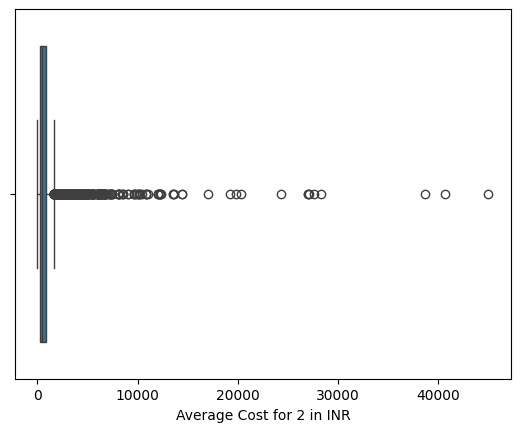

In [15]:
sns.boxplot(x='Average Cost for 2 in INR', data=df)

In [16]:
df.to_csv('cleaned_dataset.csv', index=False)